In [1]:
'''
In this notebook, we'll predict product demand using a Seasonal ARIMA model.
You can read more about it here: https://towardsdatascience.com/time-series-forecasting-with-a-sarima-model-db051b7ae459

We've set up most of the functionality, so you'll only need to add a few lines of code.
'''

"\nIn this notebook, we'll predict product demand using a Seasonal ARIMA model.\nYou can read more about it here: https://towardsdatascience.com/time-series-forecasting-with-a-sarima-model-db051b7ae459\n\nWe've set up most of the functionality, so you'll only need to add a few lines of code.\n"

In [2]:
### In this cell, we import the resequite libraries.

import pandas as pd
import numpy as np
#import pulp

import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
### In this cell, we read the data into a dataframe called 'orders'.

orders = pd.read_csv('updated_orders.csv')

In [4]:
### Predict demand for Port 09
### Dataframe (y) must have date as the index and have a single column (called a series)

def plot_demand_prediction(y, start_prediction_date):
    y.index = pd.to_datetime(y.index)
    y = pd.DataFrame(y.reset_index())
    y = y[y['Order Date'] < '12/31/2019']
    y = y.groupby('Order Date').sum()
    
    mod = sm.tsa.statespace.SARIMAX(y, order=(1, 1, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
    results = mod.fit()
    
    pred = results.get_prediction(start=pd.to_datetime(start_prediction_date), dynamic=False)
    pred_ci = pred.conf_int()
    ax = y['2019':].plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Order_Qty')
    plt.legend()
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


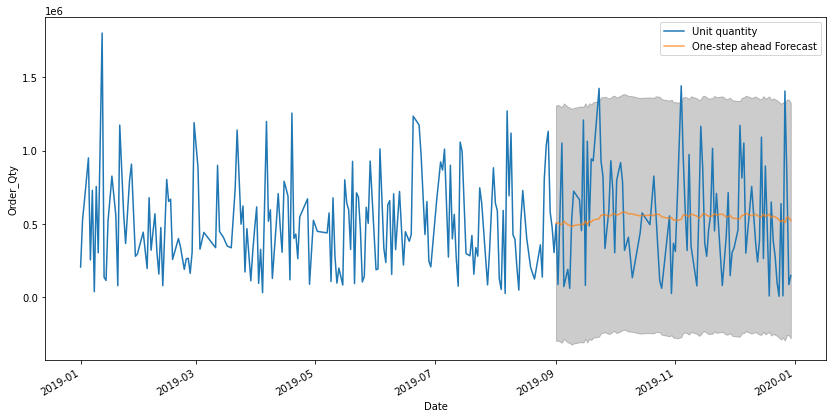

In [5]:
### See if you can create a 'y' series to make the above code run. 
### Hint: You'll need to index into when the destination port is 9. Then, set the index to the order date and use
### the unit quantity as the column to plot.
### When it works, you shouls see a plot fo the demand forecast.

orders.set_index('Order Date', inplace = True)
orders = orders[orders['Destination Port'] == 'PORT09']
y = orders['Unit quantity']

plot_demand_prediction(y, '9/1/19')